# ĐỒ ÁN LẬP TRÌNH SONG SONG ỨNG DỤNG

## DANH SÁCH THÀNH VIÊN

20120510 - Nguyễn Hữu Anh Khoa

20120322 - Đặng Thiên Long

Link github: https://github.com/huukhoa2112/LTSSUD

## ĐỀ TÀI: ENHANCING IMAGE DOCUMENT

### 1. Giới thiệu tổng quan:

**Enhancing document image** là một bước trong công việc xử lý ảnh, là bước nền cơ bản hỗ trợ cho các chức năng nâng cao khác như scan hình ảnh, chuyển đổi văn bản trong ảnh thành dạng text, điều chỉnh lại góc chụp của bức ảnh,  tối ưu hóa hình ảnh của các tài liệu hoặc văn bản số để nâng cao chất lượng, độ rõ nét và khả năng đọc của chúng.

**Input:** một bức ảnh có góc chụp không trực diện với màn hình và background dư thừa.

**Output:** một bức ảnh có góc chụp trực diện với màn hình và loại bỏ background.




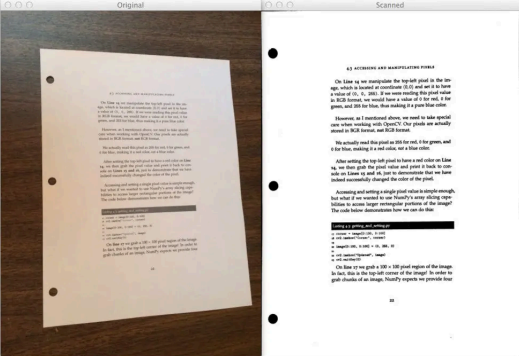

### 2. Ứng dụng của bài toán:

* Ứng dụng ở các trường học khi nộp bài tập, báo cáo online để các giáo viên dễ chấm bài và xem rõ hơn. Một số ứng dụng trên điện thoại: CamScanner, Microsoft Lens.
* Quảng cáo và marketing, tạo ra hình ảnh sạch sẽ thu hút khách hàng.
* Các web bán lẻ trực tuyến sử dụng công nghệ này giúp người mua dễ dàng nhận biết sản phẩm và tăng khả năng quyết định mua hàng.

### 3. Vì sao cần song song hóa?

Bài toán **Enhancing document image** cần được song song hóa là vì:

- Sự phức tạp của thuật toán ở các bước xử lí hình ảnh, các phép biến đổi hình học và loại bỏ background.
- Sự không đồng nhất giữa các bức ảnh do mỗi ảnh đều có cấu trúc và độ phức tạp khác nhau.
- Tăng tốc độ xử lí và tối ưu hóa GPU.

### 4. Ý tưởng chung 

Các bước thực hiện:

- Phát hiện biên cạnh.
- Xác định viền của đối tượng dựa trên các cạnh đã xác định.
- Đưa ảnh về đối diện màn hình.
- Điều chỉnh độ tương phản, độ sáng của bức ảnh.

#### 4.1 Phát hiện biên cạnh


* Phát hiện biên cạnh là bước tìm ra các biên thuộc các đối tượng trong ảnh, nhầm phân tách và biết được hình dạng (shape) các đối tượng đó.
* Có 2 thuật toán nổi tiếng cho bài toán này là Sobel edge detector và Canny edge detector.
* Trong bài toán này nhóm chọn sử dụng thuật toán Canny edge detector. Thuật toán gồm 4 giai đoạn nhỏ:
    
    1. Làm mịn hình ảnh (giảm nhiễu): tiến hành làm mờ và giảm nhiễu cho bức ảnh bằng Gaussian ([Công thức của Gaussian Filter](https://docs.opencv.org/2.4/doc/tutorials/imgproc/gausian_median_blur_bilateral_filter/gausian_median_blur_bilateral_filter.html#gaussian-filter)). Điều này giúp giảm các đỉnh và đáy không mong muốn trong đồ thị biểu diễn cạnh, giúp tạo ra kết quả cạnh chính xác hơn.

    **Công thức Gaussian Filter:**

  $$G_{0}(x, y) = A  e^{ \dfrac{ -(x - \mu_{x})^{2} }{ 2\sigma^{2}_{x} } +  \dfrac{ -(y - \mu_{y})^{2} }{ 2\sigma^{2}_{y} } }$$

  **Trong đó:** μ là giá trị trung bình (đỉnh) và σ biểu thị độ lệch chuẩn (cho mỗi biến x và y)
    
    2. Tính Gradient và hướng gradient: Sau khi làm mịn hình ảnh, gradient của hình ảnh được tính toán để xác định các pixel có độ dốc cao nhất. Sử dụng bộ lọc Sobel X và Sobel Y để lấy ra được đạo hàm theo chiều ngang (Gx) và dọc của bức ảnh (Gy). Từ đó ta sẽ tính được  gradient (độ lớn của sự biến đổi mức sáng ở vị trí pixel tương ứng với ảnh gốc) và hướng của từng pixel trong ảnh theo công thức sau. Trong đó hướng của cạnh được chia thành 4 hướng đại diện: ngang (0 độ), chéo bên phải (45 độ), dọc (90 độ), chéo bên trái (135 độ). 
  $$Edge\_Gradient(G) = \sqrt{G^2_x + G^2_y}$$

  $$Angle (Θ) = tan^{-1} (\frac{G_y}{G_x})$$
  
    3. Tính non-max suppression (loại bỏ pixel không cần thiết): Mục đích lọc bỏ các pixel không phải là cực đại cục bộ. Ta sử dụng 1 filter 3x3 chạy lần lượt qua các pixel của ảnh sau khi đã gradient. Trong các lần chạy, ta xét độ lớn của pixel hiện tại có phải là cực đại so với 2 hàng xóm (dựa trên hướng gradient)  hay không. Nếu là cực đại thì ghi nhận lại pixel đó, ngược lại set độ lớn của pixel đó bằng 0.

    <div style="text-align:center">
      <img src="https://docs.opencv.org/4.x/nms.jpg" alt="Image" />
    </div>
   
  
    4. Lọc ngưỡng: ở đây ta có 2 giá trị được gọi là maxVal và minVal. Nếu pixel hiện tại có giá trị lớn hơn maxVal thì pixel đó là cạnh, nhỏ hơn minVal thì bị loại bỏ. Còn các pixel nằm giữa maxVal và minVal, ta sẽ xét nó nằm gần với bên nào để quyết định có giữ lại nó hay không. 

    <div style="text-align:center">
      <img src="https://docs.opencv.org/4.x/hysteresis.jpg" alt="Image" />
    </div>
    


**Nguồn:** https://minhng.info/tutorials/xu-ly-anh-opencv-hien-thuc-canny-edge.html

#### 4.2 Xác định viền của đối tượng dựa trên các cạnh đã xác định

Mục tiêu của bước này này là lấy ra được viền của ảnh đã lấy biên, các pixel của ảnh lúc này chỉ là 0 hoặc 255. Sử dụng hàm OpenCV cho bước này vì nhóm không tìm được thuật toán tham khảo để có thể thực hiện cài đặt tuần tự và đưa ra đánh giá. Giá trị trả ra của hàm là toàn bộ các viền có trong ảnh, các viền ở đây là tập hợp các pixel có giá trị 255 và liền kề nhau.

#### 4.3 Đưa ảnh về đối diện màn hình

* Lúc này, ta sẽ lấy các pixel nằm bên trong viền đã được nhận diện ở bước trước đó, thực hiện việc map các điểm ảnh này sang một không gian tọa độ mới (đối diện màn hình).

* Các hướng tiếp cận cho bước có điểm chung là đều được thực hiện bằng cách nhân ma trận trên một hệ tọa độ đồng nhất ([Homogeneous coordinates](https://en.wikipedia.org/wiki/Homogeneous_coordinates)):

    * Sử dụng các **phép xoay ảnh**: Xoay bức ảnh quanh một điểm theo một góc xác định nào đó, vẫn giữ nguyên các tính chất của ảnh (các góc của ảnh vẫn giữ nguyên).
    * Sử dụng **phép biến đổi affine**: Cần xác định ba điểm trên ảnh gốc và vị trí của chúng trên ảnh kết quả. Biến đổi affine giúp tạo ra nhiều tư thế, biến thể khác nhau của vật thể. Các biến thể này sẽ được bảo toàn tính song song, tỉ lệ khoảng cách của vật thể và các đường thẳng trong ảnh.
    * Sử dụng **biến đổi phối cảnh** (Perspective transform hoặc Homography transform): Đây là một phép biến đổi đặc biệt khi mà ảnh kết quả không được đảm bảo về góc, độ dài, tính song song so với ảnh gốc ngoại trừ bảo toàn đường thẳng.


**Phép biến đổi Homography**

* Đối với bài toán này, hình dạng của văn bản trong ảnh đầu vào đa dạng và không phải luôn là chữ nhật $→$ **biến đổi phối cảnh** sẽ là giải pháp tốt nhất để có thể đưa văn bản về đối diện màn hình.

* Các bước thực hiện phép biến đổi Homography:
    
    1. Xác định 4 điểm góc của văn bản trong ảnh đầu vào (source points) và xem nó là 4 đỉnh của ảnh đầu ra (target points).
    
    2. Dựa trên 4 điểm đã chọn, tính chiều dài và rộng cho ảnh đầu ra $→$ xác định được tọa độ 4 đỉnh trong không gian mới và kích thước của ảnh output.
    
    3. Khi đã có được source và target points thì ta có thể dễ dàng tính được ma trận biến đổi **H** (3x3).
    
    4. Thực hiện việc chuyển đổi tọa độ cho từng điểm ảnh bằng công thức sau:
    $$dst(x,y) = src(\frac{H_{0,0}x + H_{0,1}y + H_{0,2}}{H_{2,0}x + H_{2,1}y + H_{2,2}},\frac{H_{1,0}x + H_{1,1}y + H_{1,2}}{H_{2,0}x + H_{2,1}y + H_{2,2}})$$ 


<div style="text-align:center">
    <img src="https://docs.opencv.org/4.x/homography_perspective_correction.jpg" alt="Image" />
</div>

**Nguồn**: [OpenCV, Basic concepts of the homography explained with code.](https://docs.opencv.org/4.x/d9/dab/tutorial_homography.html)

##### 4.4 Điều chỉnh độ sáng, độ tương phản của ảnh

* Điều chỉnh độ sáng, độ tương phản của bức ảnh sau khi đã đưa ảnh tài liệu về chính diện màn hình.
* Trong GIMP, mức độ tương phản đi từ -127 đến +127


* Bước đầu tiên là tính toán hệ số hiệu chỉnh độ tương phản được đưa ra bởi công thức sau:

>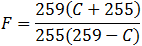

* Để thuật toán hoạt động chính xác, giá trị của hệ số hiệu chỉnh độ tương phản ( F ) cần được lưu trữ dưới dạng số dấu phẩy động chứ không phải số nguyên. Giá trị C trong công thức biểu thị mức độ tương phản mong muốn.

* Bước tiếp theo là tự thực hiện điều chỉnh độ tương phản thực tế. Công thức sau đây cho thấy sự điều chỉnh độ tương phản được thực hiện đối với thành phần màu đỏ của một màu:

>image.png

* Ta sẽ điều chỉnh công thức lại để phù hợp:

>f = 131 * (tương phản + 127) / (127 * (131-tương phản))

>new_image = f * (old_image - 127) + 127 = f * (old_image) + 127 * (1-f)

* Tiếp theo ta sẽ tìm ra độ sáng

* Đầu tiên, hãy tính toán giá trị hiệu chỉnh gamma để sử dụng cho việc điều chỉnh âm trung (nếu muốn). Phần sau mô phỏng gần đúng kỹ thuật của Photoshop, áp dụng gamma 9.99-1.00 cho các giá trị midtone 0-128 và 1.00-0.01 cho 128-255.

**Apply gamma correction:**

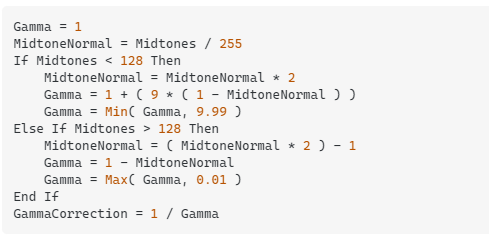


* Sau đó, đối với mỗi giá trị kênh R, G, B (0-255) cho mỗi pixel, hãy thực hiện theo thứ tự sau.

**Apply the input levels:**

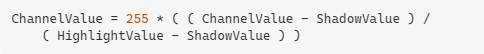

**Apply the midtones:**

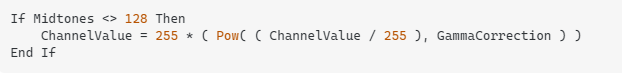

**Apply the output levels:**

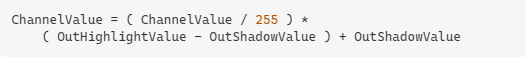

**Where:**

* Tất cả các giá trị kênh và thông số điều chỉnh là số nguyên, bao gồm 0-255
* Shadow / Midtone / HighlightValue là các giá trị điều chỉnh đầu vào (mặc định 0, 128, 255)
* OutShadow / HighlightValue là các giá trị điều chỉnh đầu ra (mặc định là 0, 255)
* Ta sẽ tối ưu hóa mọi thứ và đảm bảo các giá trị được giữ trong giới hạn (chẳng hạn như 0-255 cho mỗi kênh)
* Để mô phỏng Photoshop chính xác hơn, bạn có thể sử dụng đường cong nội suy phi tuyến tính nếu Midtones <128. Theo mặc định, Photoshop cũng cắt bỏ 0,1% giá trị tối nhất và sáng nhất.





















### 5. Cài đặt tuần tự:

Import các thư viện cần thiết

In [4]:
import numpy as np
from numba import *
from PIL import *
import requests
from io import BytesIO
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
import math
import time
from numba import jit, cuda

from itertools import permutations
import pandas as pd

from skimage.filters import threshold_local

import warnings
warnings.filterwarnings('ignore')

Chọn bức ảnh cần chỉnh

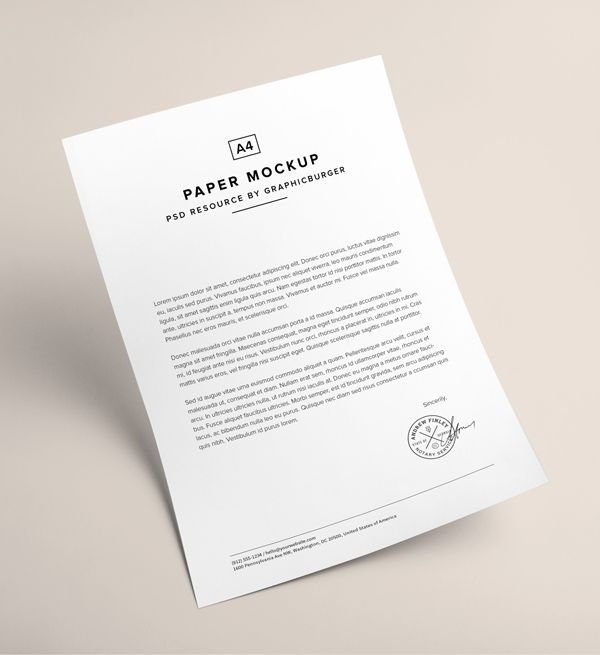

In [5]:
img_path = 'test.jpg'
img = np.asarray(Image.open(img_path))
Image.open(img_path)

#### 5.1 Hàm làm xám ảnh

In [6]:
@jit(cache=True)
def convert_RGB_To_Gray(img):
    gray = np.zeros((img.shape[0],img.shape[1]), img.dtype)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            gray[i,j] = round(img[i,j,0] * 0.2989  + img[i,j,1] * 0.5870 + img[i,j,2] * 0.1141, 0)
    
    return gray

Ảnh sau khi làm xám

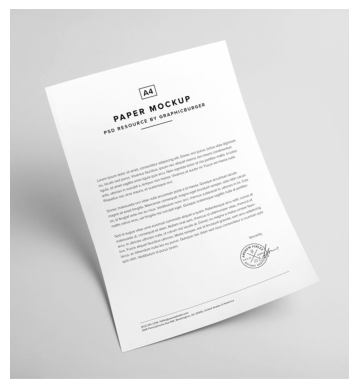

In [7]:
gray = convert_RGB_To_Gray(img)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

#### 5.2 Convolution Kernel

In [42]:
@jit(cache=True)
def convolution(img, kernel):
    rows, cols = img.shape
    rows_k, cols_k = kernel.shape
    
    # Tạo một mảng mới có cùng kích thước với ảnh đầu vào để lưu kết quả convolution
    img_out = np.zeros((rows, cols), dtype=img.dtype)
    
    # Lặp qua từng pixel trong ảnh đầu vào
    for r in range(rows):
        for c in range(cols):
            # Khởi tạo tổng convolution cho pixel hiện tại
            out = 0
            
            # Lặp qua từng pixel trong kernel
            for r_k in range(rows_k):
                for c_k in range(cols_k):
                    # Tính toán chỉ số hàng và cột của pixel trong ảnh đầu vào
                    in_r = r - rows_k // 2 + r_k
                    in_c = c - cols_k // 2 + c_k
                    
                    # Giới hạn chỉ số hàng và cột trong phạm vi của ảnh
                    in_r = min(max(0, in_r), rows - 1)
                    in_c = min(max(0, in_c), cols - 1)
                    
                    # Tính toán convolution và cộng vào tổng
                    out += kernel[r_k, c_k] * img[in_r, in_c]
            
            # Gán giá trị convolution đã tính cho pixel tương ứng trong mảng kết quả
            img_out[r, c] = round(out)
    
    return img_out

#### 5.3 Hàm tính element-wise cho ma trận

In [43]:
@jit(cache = True)
def edgeSobel(mat1, mat2):
    """
    Tính gradient cạnh của ảnh sử dụng phương pháp Sobel.

    Tham số:
    - mat1: Ma trận gradient theo trục x.
    - mat2: Ma trận gradient theo trục y.
    """
    return np.sqrt(mat1**2 + mat2**2)

@jit(cache = True)
def angleGrad(mat1, mat2):
    """
    Tính góc gradient của ảnh sử dụng phương pháp Sobel.

    Tham số:
    - mat1: Ma trận gradient theo trục x.
    - mat2: Ma trận gradient theo trục y.
    """
    out_mat = np.arctan2(mat2, mat1) * (180/np.pi)
    out_mat[out_mat < 0] += 180
    return out_mat

#### 5.4 Gaussian Kernel

In [44]:
@jit(cache = True)
def gaussian_kernel(size, sigma):
    """
    Tạo ma trận Gaussian Kernel.

    Tham số:
    - size: Kích thước của ma trận Gaussian Kernel (phải là một số lẻ).
    - sigma: Độ lệch chuẩn của phân phối Gaussian.

    Trả về:
    Mảng NumPy, ma trận Gaussian Kernel.
    """
    if size % 2 == 0:
        raise ValueError("Kích thước của ma trận Gaussian Kernel phải là một số lẻ.")
    
    kernel = np.zeros((size, size))
    center = size // 2
    
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Chuẩn hóa ma trận kernel để tổng các phần tử bằng 1
    kernel /= np.sum(kernel)
    
    return kernel

In [45]:
gau_kernel = gaussian_kernel(3,1)

#### 5.5 Sobel Kernel

In [46]:
sobel_x_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32)
sobel_y_kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], np.float32)

#### 5.6 Hàm tính edge gradient

In [47]:
@jit(cache = True)
def edgeGradient(img, sobel_x_kernel, sobel_y_kernel):
    sobel_x = convolution(img, sobel_x_kernel)
    sobel_y = convolution(img, sobel_y_kernel)
    edge_sobel = np.hypot(sobel_x, sobel_y)
    
    # Convert radian value to degree
    angle = np.arctan2(sobel_y, sobel_x) * 180 / np.pi
    angle[angle < 0] += 180
        
    return edge_sobel, angle

#### 5.7 Hàm xác đinh non-max suppression

In [54]:
@jit(cache=True)
def nonMaxSuppression(img, angle):
    rows, cols = img.shape
    suppressed = np.zeros(img.shape, np.int32)

    for r in range(1, rows - 1):
        for c in range(1, cols - 1):
            q, t = 255, 255
            
            if 0 <= angle[r,c] < 22.5 or 180 >= angle[r,c] >= 157.5:
                q, t = img[r, c+1], img[r, c-1]
            elif 67.5 > angle[r,c] >= 22.5:
                q, t = img[r+1, c-1], img[r-1, c+1]
            elif 112.5 > angle[r,c] >= 67.5:
                q, t = img[r+1, c], img[r-1, c]
            elif 157.5 > angle[r,c] >= 112.5:
                q, t = img[r-1, c-1], img[r+1, c+1]
            
            if img[r,c] >= q and img[r,c] >= t:
                suppressed[r,c] = img[r,c]
            else:
                suppressed[r,c] = 0

    return suppressed

#### 5.8 Hàm lọc ngưỡng

In [61]:
@jit(cache=True)
def thresholding(img, min_thres, max_thres):
    max_val = np.max(img) * max_thres
    min_val = max_val * min_thres
    
    # Tạo mặt nạ có cùng kích thước với ảnh và các giá trị ban đầu là 0
    canny_mask = np.zeros_like(img, dtype=np.uint8)
    
    # Xác định các điểm có giá trị vượt ngưỡng cao
    strong_edges_mask = (img > max_val)
    canny_mask[strong_edges_mask] = 255
    
    # Xác định các điểm có giá trị giữa ngưỡng thấp và ngưỡng cao và có ít nhất một điểm láng giềng vượt ngưỡng cao
    weak_edges_mask = (img <= max_val) & (img > min_val)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if weak_edges_mask[x, y]:
                # Kiểm tra các điểm láng giềng
                start_x, end_x = max(0, x-1), min(img.shape[0], x+2)
                start_y, end_y = max(0, y-1), min(img.shape[1], y+2)
                
                neighbor_values = img[start_x:end_x, start_y:end_y]
                if np.any(neighbor_values > max_val):
                    canny_mask[x, y] = 255
    
    return canny_mask

Sau khi xác định được 4 bước phát hiện biên cạnh theo **Canny edge detector** thì sau đây là ảnh phát hiện biên cạnh

In [62]:
min_thres = 0.05 
max_thres = 0.15
gaussianBlur = convolution(gray, gau_kernel)
edge_sobel, angle = edgeGradient(gaussianBlur, sobel_x_kernel, sobel_y_kernel)
non_max_suppression = nonMaxSuppression(edge_sobel, angle)
canny_edge = thresholding(non_max_suppression, min_thres, max_thres)

(-0.5, 599.5, 654.5, -0.5)

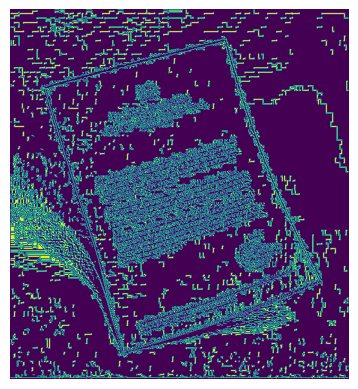

In [68]:
plt.imshow(canny_edge, cmap='viridis')
plt.axis('off')

#### 5.9 Hàm xác định 4 góc

In [44]:
def get_pos(lst_can, min_val, max_val, pos=0):
    """
    Xác định các vị trí trong danh sách thỏa mãn giá trị tối thiểu và tối đa cho một trục cụ thể.

    Tham số:
    - lst_can: Danh sách các vị trí cần kiểm tra.
    - min_val: Giá trị tối thiểu.
    - max_val: Giá trị tối đa.
    - pos: Vị trí trục cần kiểm tra.
    """
    min_candidates = lst_can[lst_can[:, pos] == min_val]
    max_candidates = lst_can[lst_can[:, pos] == max_val]

    if len(min_candidates) == 0:
        return max_candidates[0], -1
    elif len(max_candidates) == 0:
        return min_candidates[0], -1
    elif len(min_candidates) == 1 and len(max_candidates) == 1:
        return min_candidates[0], max_candidates[0]
    elif len(min_candidates) == 1:
        return min_candidates[0], -1
    elif len(max_candidates) == 1:
        return max_candidates[0], -1

def get_points(xy, lst):
    """
    Thêm các điểm vào danh sách.

    Tham số:
    - xy: Các tọa độ cần thêm vào danh sách.
    - lst: Danh sách cần thêm vào.

    """
    if xy[1] == -1:
        lst.append(xy[0])
    else:
        lst.extend(xy)

def get_4_vertices(t, l, r, b, lst_v):
    """
    Xác định 4 điểm đỉnh từ các cạnh của hình.

    Tham số:
    - t: Cạnh trên.
    - l: Cạnh trái.
    - r: Cạnh phải.
    - b: Cạnh dưới.
    - lst_v: Danh sách chứa các điểm đỉnh.

    """
    lst = []

    get_points(list(t), lst)
    get_points(list(l), lst)
    get_points(list(r), lst)
    get_points(list(b), lst)

    for point in lst:
        if point not in lst_v:
            lst_v.append(point)

def get_l_r(lst, pts, is_top=True):
    """
    Xác định hai điểm trái và phải từ một danh sách và một tập hợp các điểm.

    Tham số:
    - lst: Danh sách cần kiểm tra.
    - pts: Tập hợp chứa các điểm.
    - is_top: Biến bool xác định xem các điểm là trên cùng hay không.

    Trả về:
    Hai điểm trái và phải.
    """
    l = []
    for i in lst:
        for v in pts:
            if i == v[0]:
                l.append(v)
    l.sort(key=lambda x: x[1])
    if is_top:
        return l[0], l[1]
    else:
        return l[1], l[0]

In [45]:
def order_points_np(pts):
    """
    Sắp xếp các điểm theo thứ tự cụ thể.

    Tham số:
    - pts: Danh sách các điểm cần sắp xếp.

    Trả về:
    Danh sách các điểm đã được sắp xếp.
    """
    rect = np.zeros((4, 2), dtype="float32")

    # Tính tổng các tọa độ của mỗi điểm
    s = pts.sum(axis=1)
    # Lấy điểm có tổng nhỏ nhất và lớn nhất
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # Tính hiệu giữa hai tọa độ của mỗi điểm
    diff = np.diff(pts, axis=1)
    # Lấy điểm có hiệu nhỏ nhất và lớn nhất
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect

def order_points_py(pts):
    """
    Sắp xếp các điểm theo thứ tự cụ thể.

    Tham số:
    - pts: Danh sách các điểm cần sắp xếp.

    Trả về:
    Danh sách các điểm đã được sắp xếp.
    """
    t, b = np.sort(pts[:, 0])[:2], np.sort(pts[:, 0])[2:]

    order_vertices = []
    order_vertices.extend(list(get_l_r(t, pts)))
    order_vertices.extend(list(get_l_r(b, pts, False)))

    return np.array(order_vertices)

#### 5.10 Hàm xác định các tọa độ mới cho ảnh

In [ ]:
@jit(cache=True)
def map_pos_homography(img, new_i, H):
    """
    Ánh xạ các điểm trong ảnh mới đến ảnh gốc bằng ma trận homography.

    Tham số:
    - img: Ảnh gốc.
    - new_i: Ảnh mới cần ánh xạ.
    - H: Ma trận homography.

    Trả về:
    Ảnh mới đã được ánh xạ từ ảnh gốc.
    """
    new_img = new_i.copy()
    for r in range(new_img.shape[0]):
        for c in range(new_img.shape[1]):
            # Tính toán tọa độ mới dựa trên ma trận homography
            x = (H[0, 0] * c + H[0, 1] * r + H[0, 2]) / (H[2, 0] * c + H[2, 1] * r + H[2, 2])
            y = (H[1, 0] * c + H[1, 1] * r + H[1, 2]) / (H[2, 0] * c + H[2, 1] * r + H[2, 2])
            # Làm tròn tọa độ
            x = int(x + 0.5)
            y = int(y + 0.5)
            # Kiểm tra xem tọa độ mới có nằm trong phạm vi ảnh gốc không
            if 0 <= y < img.shape[0] and 0 <= x < img.shape[1]:
                new_img[r, c] = img[y, x]
    return new_img


#### 5.11 Hàm điều chỉnh độ sáng, độ tương phản

In [46]:
def controller(img, brightness=255, contrast=127):
    brightness = int((brightness - 0) * (255 - (-255)) / (510 - 0) + (-255))
    contrast = int((contrast - 0) * (127 - (-127)) / (254 - 0) + (-127))
    
    alpha = 1.0 + float(contrast) / 100
    beta = float(brightness)

    adjusted_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return adjusted_image

#### 5.12 Hàm xoay, lật ảnh

In [47]:
@jit(cache=True)
def flipImg(img, axis=1): #1: y, 0: x
    """
    Lật ảnh theo trục x hoặc y.

    Tham số:
    - img: Ảnh cần lật.
    - axis: Trục lật, 1 để lật theo trục y, 0 để lật theo trục x.
    """
    if axis == 1:
        new_img = img[:, ::-1]
    else:
        new_img = img[::-1, :]
    return new_img

@jit(cache=True)
def rotImg(img, clockwise=True):
    """
    Xoay ảnh 90 độ theo chiều kim đồng hồ hoặc ngược chiều kim đồng hồ.

    Tham số:
    - img: Ảnh cần xoay.
    - clockwise: True để xoay theo chiều kim đồng hồ, False để xoay ngược chiều kim đồng hồ.

    Trả về:
    Ảnh đã được xoay.
    """
    if clockwise:
        new_img = np.rot90(img, k=-1)
    else:
        new_img = np.rot90(img)
    return new_img